Importing Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Dataset path

In [2]:
data_set_path='/content/drive/MyDrive/Datasets/Cat and dog'

In [3]:
train_data_path='/content/drive/MyDrive/Datasets/Cat and dog/training_set/training_set'
test_data_path='/content/drive/MyDrive/Datasets/Cat and dog/test_set/test_set'

Making Images into linear  format using tensorflow  ImageDataGenerator

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image  import ImageDataGenerator 

In [5]:
preprocess_train=ImageDataGenerator(rescale=1. /255,
                                 shear_range=0.2,
                                 zoom_range=0.4,
                                 vertical_flip=True,
                                 horizontal_flip=True)

preprocess_test=ImageDataGenerator(rescale=1./255)

Collecting each image from train and test folder

In [6]:
labels=['cats','dogs']

In [7]:
train_data=preprocess_train.flow_from_directory(train_data_path,
                                                target_size=[256,256],
                                                class_mode='binary',
                                                classes=labels,
                                                batch_size=32)
test_data=preprocess_test.flow_from_directory(test_data_path,
                                              target_size=[256,256],
                                              class_mode='binary',
                                              classes=labels,
                                              batch_size=32)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


Now i am taking copy of VGG16 Architecture

In [8]:
from tensorflow.keras.applications.vgg16 import VGG16

Making Image Size

In [9]:
Image_size=[256,256]

In [10]:
sol=VGG16(input_shape=Image_size + [3] , weights='imagenet' , include_top = False)

58889256/58889256 [==============================] - 4s 0us/step


In [11]:
#to make not to update weights of VGG16

for i in sol.layers:
  i.trainable = False

In [12]:
# developing my own output layer

from tensorflow.keras.layers import Flatten

In [13]:
y=Flatten()(sol.output)

In [14]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import sigmoid

In [15]:
from keras.api._v2.keras import activations
final = Dense(1, activation = 'sigmoid')(y)

In [16]:
from tensorflow.keras.models import Model

In [17]:
vgg16_model = Model(sol.inputs, final)

In [18]:
vgg16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [19]:
vgg16_model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['Accuracy'])

In [21]:
vgg16_model.fit(train_data , epochs = 2)

Epoch 1/2
251/251 [==============================] - 2343s 9s/step - loss: 0.4153 - Accuracy: 0.8052
Epoch 2/2
251/251 [==============================] - 147s 587ms/step - loss: 0.3343 - Accuracy: 0.8506


Checking with test_data

In [23]:
test_data.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [24]:
y_test_pred=vgg16_model.predict(test_data)

64/64 [==============================] - 1127s 18s/step


In [25]:
y_test_pred

array([[0.0022894 ],
       [0.9995881 ],
       [0.9501529 ],
       ...,
       [0.6994656 ],
       [0.15126085],
       [0.9993155 ]], dtype=float32)

In [26]:
c=[]

for i in y_test_pred:
  if i>0.5:
    c.append(1)
  else:
    c.append(0)


In [27]:
c

[0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,


In [28]:
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix

In [29]:
accuracy_score(test_data.classes , c)

0.48591201186356897

In [30]:
confusion_matrix(test_data.classes, c)

array([[464, 547],
       [493, 519]])

In [31]:
print(classification_report(test_data.classes ,c))

              precision    recall  f1-score   support

           0       0.48      0.46      0.47      1011
           1       0.49      0.51      0.50      1012

    accuracy                           0.49      2023
   macro avg       0.49      0.49      0.49      2023
weighted avg       0.49      0.49      0.49      2023



Checking with own data

In [32]:
import cv2

In [35]:
def predictions(path):
  image = cv2.imread(path)
  image = cv2.resize(image , (256,256))
  image = np.array(image) / 255.0
  image = np.expand_dims(image , axis = 0)
  print(image.shape)
  result = vgg16_model.predict(image)
  print(result)
  if result > 0.5:
    print('dog')
  else:
    print('cat')
  img = plt.imread(path)
  plt.imshow(img)

(1, 256, 256, 3)
1/1 [==============================] - 1s 658ms/step
[[7.217962e-05]]
cat


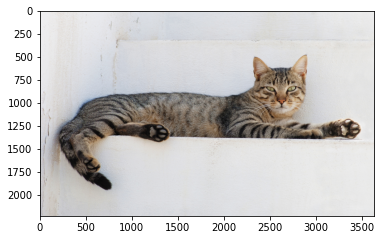

In [36]:
predictions('/content/drive/MyDrive/Datasets/Cat_August_2010-4.jpg')

(1, 256, 256, 3)
1/1 [==============================] - 0s 61ms/step
[[0.001169]]
cat


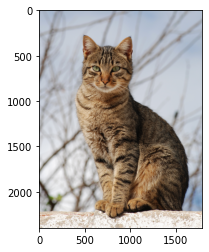

In [37]:
predictions('/content/drive/MyDrive/Datasets/Cat_November_2010-1a.jpg')

(1, 256, 256, 3)
1/1 [==============================] - 0s 30ms/step
[[0.99999475]]
dog


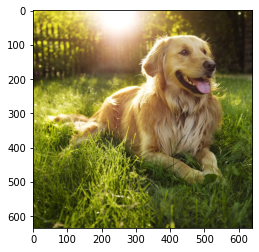

In [39]:
predictions('/content/drive/MyDrive/Datasets/golden-retriever-royalty-free-image-506756303-1560962726.jpg')

(1, 256, 256, 3)
1/1 [==============================] - 0s 20ms/step
[[0.9995577]]
dog


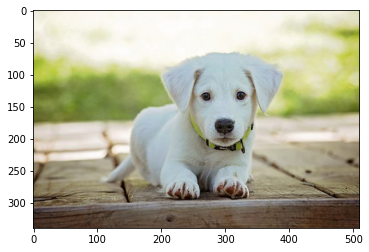

In [40]:
predictions('/content/drive/MyDrive/Datasets/puppy-1903313__340.jpg')